In [3]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import mysql.connector
import matplotlib.pyplot as plt

C:\Users\anisa\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\anisa\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\anisa\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [5]:
def sql_query_executor(query):
    
    try:
    
        db_config = {'host':'localhost',
             'database':"hotel_restaurant_management",
             'user':'root',
             'password':'black97tiger19'
                }

        conn = mysql.connector.connect(**db_config)

        if conn.is_connected():
            cursor = conn.cursor()
            cursor.execute("select database();")
            r = cursor.fetchone()
            cursor.execute(query)
            col = [i[0] for i in cursor.description]
            rows = cursor.fetchall()

            df = pd.DataFrame(rows,columns=col)
            return df
    
    except Error as e:
        print("Error during connection",e)
        
    finally:
        if conn.is_connected():
            cursor.close()
            conn.close()
    

In [49]:
query1="""select h.hotel_ID, h.hotel_Name, a.C as number_of_deliveries  from hotel h join (select 
d.hotel_ID, count(d.hotel_ID) as C from delivery_supply_chain d group by d.hotel_ID order by count(*) desc) 
as a on h.hotel_ID=a.Hotel_ID order by number_of_deliveries desc;"""
df = sql_query_executor(query1)
df.head()

,hotel_ID,hotel_Name,number_of_deliveries
0,107,Fairmont Copley Plaza,6
1,105,The Westin Boston Waterfront,5
2,109,The Ritz-Carlton Boston,4
3,101,Sheraton Boston,3
4,102,Marriott Cambridge,3


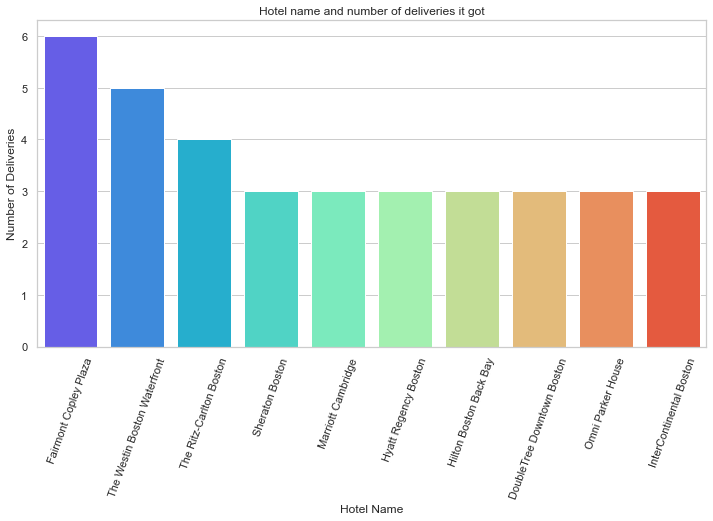

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="hotel_Name", y="number_of_deliveries", data=df, palette="rainbow")

plt.title("Hotel name and number of deliveries it got")
plt.xlabel("Hotel Name")
plt.ylabel("Number of Deliveries")
plt.xticks(rotation=70)
plt.show()


In [52]:
query2= """
    select m.item_ID, m.item_Name, a.C as number_of_times_ordered  from menu m join (select 
d.item_ID, count(d.item_ID) as C from or_order d group by d.item_ID order by count(*) desc) as a on m.item_ID=a.item_ID 
order by number_of_times_ordered desc;
"""
df = sql_query_executor(query2)
df.head()

,item_ID,item_Name,number_of_times_ordered
0,1,Paneer Tikka,6
1,2,Sushi Roll,4
2,5,Dal Makhani,4
3,9,Chicken Tikka Masala,4
4,3,Vegetable Biryani,3


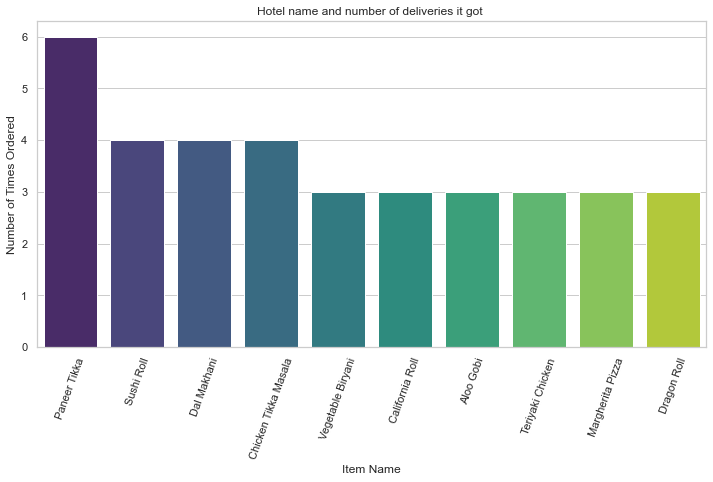

In [53]:

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="item_Name", y="number_of_times_ordered", data=df, palette="viridis")

plt.title("Hotel name and number of deliveries it got ")
plt.xlabel("Item Name")
plt.ylabel("Number of Times Ordered")
plt.xticks(rotation=70)
plt.show()

In [54]:
query3= """
select pmt_mode, count(pmt_mode) as payment_count from payment group by pmt_mode order by count(Pmt_mode) desc;
"""
df = sql_query_executor(query3)
df.head()

,pmt_mode,payment_count
0,Cash,15
1,Credit Card,14
2,Debit Card,7


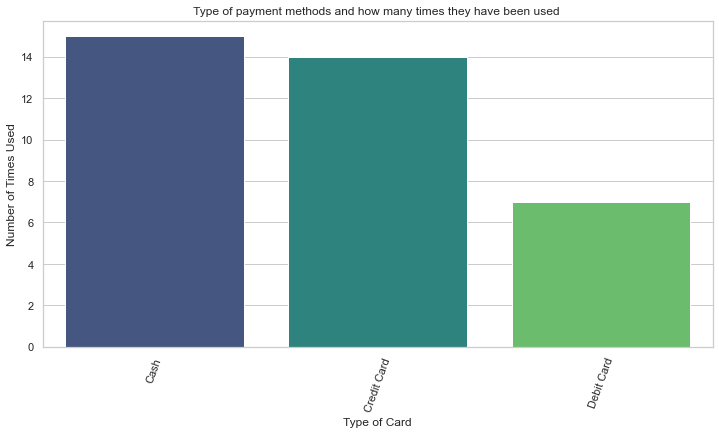

In [55]:

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="pmt_mode", y="payment_count", data=df, palette="viridis")

plt.title(" Type of payment methods and how many times they have been used  ")
plt.xlabel("Type of Card")
plt.ylabel("Number of Times Used")
plt.xticks(rotation=70)
plt.show()

In [56]:
query4= """
select h.hotel_id, h.hotel_name, count(c.hotel_id) as number_of_customers from hotel h join customer c on c.Hotel_ID=h.Hotel_ID 
group by h.Hotel_ID order by count(c.Hotel_ID) desc;
"""
df = sql_query_executor(query4)
df.head()

,hotel_id,hotel_name,number_of_customers
0,107,Fairmont Copley Plaza,7
1,105,The Westin Boston Waterfront,6
2,109,The Ritz-Carlton Boston,5
3,101,Sheraton Boston,4
4,102,Marriott Cambridge,4


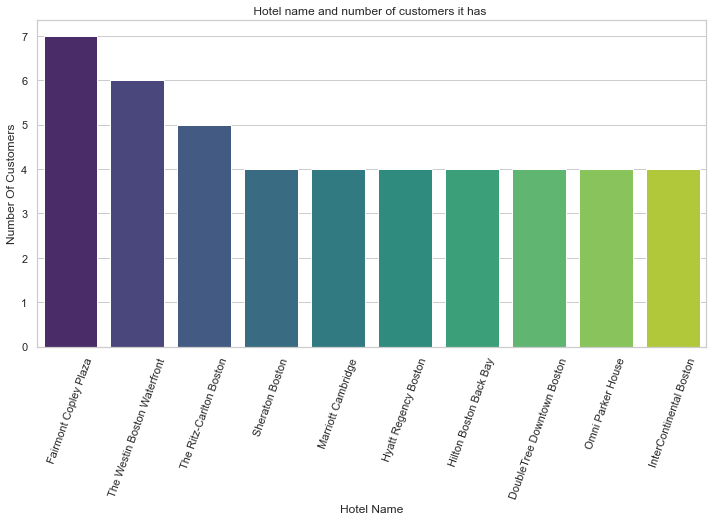

In [57]:

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="hotel_name", y="number_of_customers", data=df, palette="viridis")

plt.title(" Hotel name and number of customers it has  ")
plt.xlabel("Hotel Name")
plt.ylabel("Number Of Customers")
plt.xticks(rotation=70)
plt.show()

In [59]:
query5= """
select Status, count(status) as status_count from delivery_system group by Status order by count(status) desc;
"""
df = sql_query_executor(query5)
df.head()

,Status,status_count
0,Delivered,19
1,Pending,17


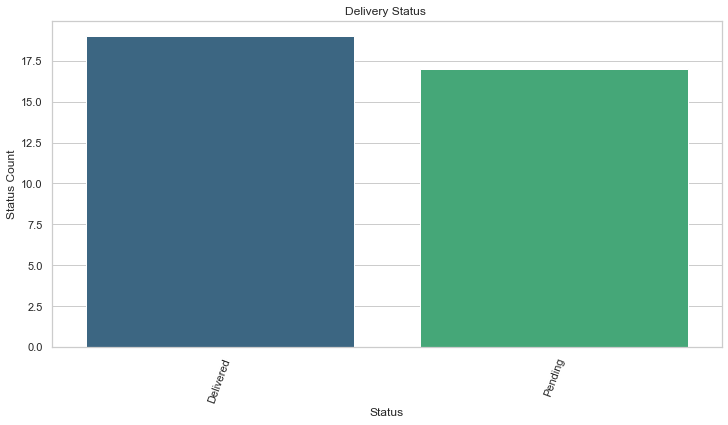

In [60]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="Status", y="status_count", data=df, palette="viridis")
plt.title("Delivery Status ")
plt.xlabel("Status")
plt.ylabel("Status Count")
plt.xticks(rotation=70)
plt.show()

In [65]:
query6= """
select item_type, count(i.item_type) as count_of_items , avg(i.item_price) as avgItem_price from 
(select item_name, Item_price,
Case 
when item_name in('Dragon Roll','Teriyaki Chicken','Chicken Tikka Masala') then 'Non_vegetarian'
else 'Vegetarian'
end
as item_type from menu m join or_order o on m.Item_ID=o.Item_ID) as i group by item_type ;
"""
df = sql_query_executor(query6)
df.head()

,item_type,count_of_items,avgItem_price
0,Vegetarian,26,13.874615
1,Non_vegetarian,10,15.490000


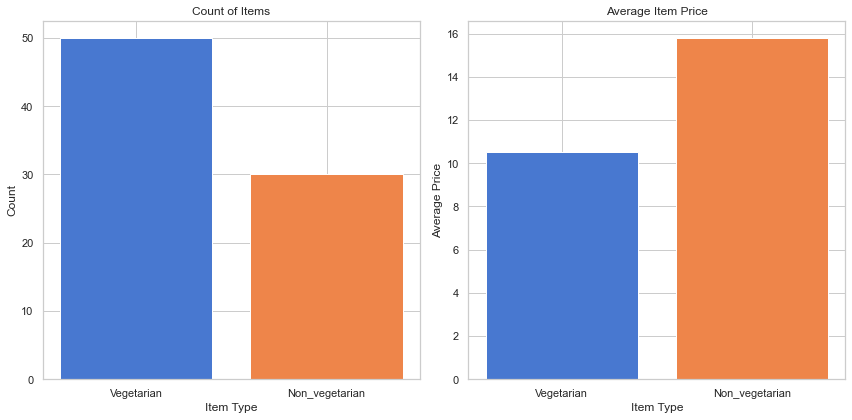

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming df is the result of your SQL query
# You can replace this with the actual data or dataframe you have

# Example data
data = {'item_type': ['Vegetarian', 'Non_vegetarian'],
        'count_of_items': [50, 30],  # Replace with your actual data
        'avgItem_price': [10.5, 15.8]}  # Replace with your actual data

df = pd.DataFrame(data)

# Set Seaborn style to whitegrid
sns.set(style="whitegrid")

# Use a Seaborn color palette for fancy and vibrant colors
palette = sns.color_palette("muted")

# Plotting count of items
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(df['item_type'], df['count_of_items'], color=palette)
plt.title('Count of Items')
plt.xlabel('Item Type')
plt.ylabel('Count')

# Plotting average item price
plt.subplot(1, 2, 2)
plt.bar(df['item_type'], df['avgItem_price'], color=palette)
plt.title('Average Item Price')
plt.xlabel('Item Type')
plt.ylabel('Average Price')

plt.tight_layout()
plt.show()


In [41]:
query7= """
select p.pmt_ID, c.cust_name, (m.item_price+r.Price) as bill from payment p join or_order o on p.Order_ID=o.Order_ID
 join reservation r on r.Cust_ID=o.Cust_ID join menu m on m.Item_ID=o.Item_ID join customer c on c.Cust_ID=o.Cust_ID order by bill desc;
"""
df = sql_query_executor(query7)
df.head()

,pmt_ID,cust_name,bill
0,1045,Vachan,818.98
1,1040,Owen Taylor,772.94
2,1030,Carter Taylor,772.94
3,1020,Oliver Miller,772.94
4,1015,Mia Wilson,766.94


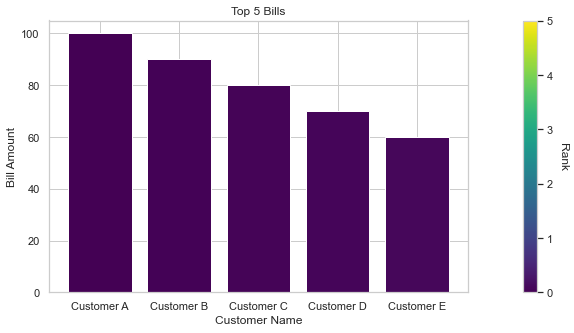

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize

# Assuming df is the result of your SQL query
# You can replace this with the actual data or dataframe you have

# Example data
data = {'pmt_ID': [1, 2, 3, 4, 5],  # Replace with your actual data
        'cust_name': ['Customer A', 'Customer B', 'Customer C', 'Customer D', 'Customer E'],  # Replace with your actual data
        'bill': [100, 90, 80, 70, 60]}  # Replace with your actual data

df = pd.DataFrame(data)

# Plotting the top N bills with a fancy colormap
top_n = 5  # Change this to the number of top bills you want to visualize
df_top = df.head(top_n)

# Choosing a colormap
cmap = get_cmap('viridis')

plt.figure(figsize=(10, 5))
bars = plt.bar(df_top['cust_name'], df_top['bill'], color=cmap(range(top_n)))
plt.title(f'Top {top_n} Bills')
plt.xlabel('Customer Name')
plt.ylabel('Bill Amount')

# Creating a ScalarMappable object
norm = Normalize(vmin=0, vmax=top_n)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Adding a color bar for reference
cbar = plt.colorbar(sm, orientation='vertical', pad=0.1)
cbar.set_label('Rank', rotation=270, labelpad=15)

plt.show()
